In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [4]:
df1 = pd.read_csv('forestfires.csv')
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
df = df1.copy()
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
df.value_counts().sum()

517

In [9]:
df.shape

(517, 31)

In [10]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.isnull()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
514,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
515,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [13]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,512,513,514,515,516
month,mar,oct,oct,mar,mar,aug,aug,aug,sep,sep,...,aug,aug,aug,aug,aug,aug,aug,aug,aug,nov
day,fri,tue,sat,fri,sun,sun,mon,mon,tue,sat,...,fri,fri,fri,fri,sun,sun,sun,sun,sat,tue
FFMC,86.2,90.6,90.6,91.7,89.3,92.3,92.3,91.5,91.0,92.5,...,91.0,91.0,91.0,91.0,81.6,81.6,81.6,81.6,94.4,79.5
DMC,26.2,35.4,43.7,33.3,51.3,85.3,88.9,145.4,129.5,88.0,...,166.9,166.9,166.9,166.9,56.7,56.7,56.7,56.7,146.0,3.0
DC,94.3,669.1,686.9,77.5,102.2,488.0,495.6,608.2,692.6,698.6,...,752.6,752.6,752.6,752.6,665.6,665.6,665.6,665.6,614.7,106.7
ISI,5.1,6.7,6.7,9.0,9.6,14.7,8.5,10.7,7.0,7.1,...,7.1,7.1,7.1,7.1,1.9,1.9,1.9,1.9,11.3,1.1
temp,8.2,18.0,14.6,8.3,11.4,22.2,24.1,8.0,13.1,22.8,...,25.9,25.9,21.1,18.2,27.8,27.8,21.9,21.2,25.6,11.8
RH,51,33,33,97,99,29,27,86,63,40,...,41,41,71,62,35,32,71,70,42,31
wind,6.7,0.9,1.3,4.0,1.8,5.4,3.1,2.2,5.4,4.0,...,3.6,3.6,7.6,5.4,2.7,2.7,5.8,6.7,4.0,4.5
rain,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

Taking numerical features 

In [15]:
numerical_feature = df.describe(include=["int64", "float"]).columns

print(list(numerical_feature))

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']


In [16]:
numerical_feature.value_counts().sum()

28

In [17]:
#seeing categorical_features

In [18]:
categorical_features = df.describe(include=["object"]).columns

print(list(categorical_features))

['month', 'day', 'size_category']


In [19]:
categorical_features.value_counts().sum()

3

In [20]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.

label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 

df['month']= label_encoder.fit_transform(df['month']) 
 

In [21]:
print(df.head())

   month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0      7  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1     10  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2     10  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3      7  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4      7  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          s

In [22]:
df['size_category'] = np.where(df['area'] > 6, '1', '0')
df['size_category']= pd.to_numeric(df['size_category'])
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,7,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,7,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
df['month'].unique()

array([ 7, 10,  1, 11,  0,  6,  5,  3,  4,  2,  8,  9])

In [24]:
# converting to is weekend
df['day'] = ((df['day'] == 'sun') | (df['day'] == 'sat'))

# renaming column
df = df.rename(columns = {'day' : 'is_weekend'})


Text(0.5, 1.0, 'Count plot of weekend vs weekday')

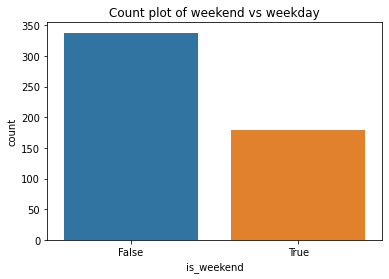

In [25]:
# visualizing
sns.countplot(df['is_weekend'])
plt.title('Count plot of weekend vs weekday')

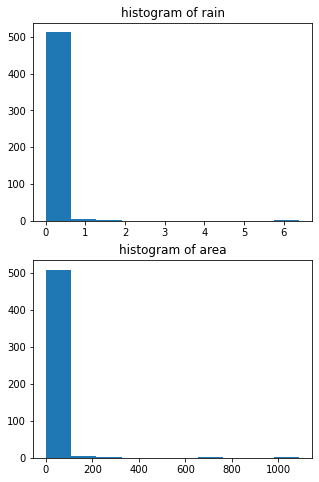

In [26]:
# visualizing
fig, ax = plt.subplots(2, figsize = (5, 8))
ax[0].hist(df['rain'])
ax[0].title.set_text('histogram of rain')
ax[1].hist(df['area'])
ax[1].title.set_text('histogram of area')

In [27]:
features = df.drop(['size_category'], axis = 1)
labels = df['size_category'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.2, random_state = 42)

In [28]:
# fitting scaler
sc_features = StandardScaler()


In [29]:
# transforming features
X_test = sc_features.fit_transform(X_test)
X_train = sc_features.transform(X_train)


In [30]:
# features
X_test = pd.DataFrame(X_test, columns = features.columns)
X_train = pd.DataFrame(X_train, columns = features.columns)


In [31]:
# labels
y_test = pd.DataFrame(y_test, columns = ['size_category'])
y_train = pd.DataFrame(y_train, columns = ['size_category'])
X_train.head()

,month,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,1.329914,1.404076,0.342959,-0.060220,0.867158,-0.249015,0.784070,-1.071784,-0.054362,-0.135002,...,-0.172345,-0.140028,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,1.570563
1,1.329914,-0.712212,-0.057456,0.370353,0.600021,-0.465731,-0.203920,-0.279375,-1.042369,-0.135002,...,-0.172345,-0.140028,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,1.570563
2,-0.963802,-0.712212,0.312158,0.834731,0.483714,0.664288,0.221938,0.248898,-0.054362,-0.135002,...,-0.172345,-0.140028,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,-0.636715
3,-0.963802,-0.712212,1.544206,1.341810,0.537142,0.664288,2.283090,-1.071784,-1.042369,-0.135002,...,-0.172345,-0.140028,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,-0.636715
4,-0.505059,1.404076,-1.320305,-1.602809,-2.022846,-0.945602,-1.106740,0.645102,-1.042369,-0.135002,...,-0.172345,7.141428,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,-0.636715


In [36]:
!pip3 uninstall keras-nightly
!pip3 uninstall -y tensorflow
!pip3 install keras==2.1.6
!pip3 install tensorflow==1.15.0
!pip3 install h5py==2.10.0

Found existing installation: tensorflow 2.11.0
Uninstalling tensorflow-2.11.0:
  Successfully uninstalled tensorflow-2.11.0
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.1.6 which is incompatible.
tensorflow-gpu 2.10.1 requires keras<2.11,>=2.10.0, but you have keras 2.1.6 which is incompatible.
tensorflow-gpu 2.10.1 requires tensorboard<2.11,>=2.10, but you have tensorboard 2.11.0 which is incompatible.
tensorflow-gpu 2.10.1 requires tensorflow-estimator<2.11,>=2.10.0, but you have tensorflow-estimator 2.11.0 which is incompatible.
ERROR: Could not find a version that satisfies the requirement tensorflow==1.15.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10

  Running setup.py clean for h5py
Failed to build h5py

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\rupak\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\rupak\\AppData\\Local\\Temp\\pip-install-y5tudcgi\\h5py_5fe563970446489ca1fb698640123984\\setup.py'"'"'; __file__='"'"'C:\\Users\\rupak\\AppData\\Local\\Temp\\pip-install-y5tudcgi\\h5py_5fe563970446489ca1fb698640123984\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\rupak\AppData\Local\Temp\pip-wheel-bhyfrbf2'
       cwd: C:\Users\rupak\AppData\Local\Temp\pip-install-y5tudcgi\h5py_5fe563970446489ca1fb698640123984\
  Complete output (1314 lines):
  C:\Users\rupak\anaconda3\lib\site-packages\setuptools\installer.py:27: SetuptoolsDeprecationWarning: setuptools.install


  Attempting uninstall: h5py
    Found existing installation: h5py 3.6.0
    Uninstalling h5py-3.6.0:
      Successfully uninstalled h5py-3.6.0
    Running setup.py install for h5py: started
    Running setup.py install for h5py: finished with status 'error'
  Rolling back uninstall of h5py
  Moving to c:\users\rupak\anaconda3\lib\site-packages\h5py-3.6.0.dist-info\
   from C:\Users\rupak\anaconda3\Lib\site-packages\~5py-3.6.0.dist-info
  Moving to c:\users\rupak\anaconda3\lib\site-packages\h5py\
   from C:\Users\rupak\anaconda3\Lib\site-packages\~5py


In [37]:
from tensorflow import keras


  Loading library to get version: hdf5.dll
  Autodetected HDF5 1.10.6
  ********************************************************************************
                         Summary of the h5py configuration
  
      Path to HDF5: None
      HDF5 Version: '1.10.6'
       MPI Enabled: False
  Rebuild Required: True
  
  ********************************************************************************
  Executing api_gen rebuild of defs
  Executing cythonize()
  [ 1/23] Cythonizing C:\Users\rupak\AppData\Local\Temp\pip-install-y5tudcgi\h5py_5fe563970446489ca1fb698640123984\h5py\_conv.pyx
  [ 2/23] Cythonizing C:\Users\rupak\AppData\Local\Temp\pip-install-y5tudcgi\h5py_5fe563970446489ca1fb698640123984\h5py\_errors.pyx
  [ 3/23] Cythonizing C:\Users\rupak\AppData\Local\Temp\pip-install-y5tudcgi\h5py_5fe563970446489ca1fb698640123984\h5py\_objects.pyx
  [ 4/23] Cythonizing C:\Users\rupak\AppData\Local\Temp\pip-install-y5tudcgi\h5py_5fe563970446489ca1fb698640123984\h5py\_proxy.pyx
  [ 5/2

    Loading library to get version: hdf5.dll
    Autodetected HDF5 1.10.6
    ********************************************************************************
                           Summary of the h5py configuration
    
        Path to HDF5: None
        HDF5 Version: '1.10.6'
         MPI Enabled: False
    Rebuild Required: True
    
    ********************************************************************************
    Executing cythonize()
    [ 1/23] Cythonizing C:\Users\rupak\AppData\Local\Temp\pip-install-y5tudcgi\h5py_5fe563970446489ca1fb698640123984\h5py\_conv.pyx
    [ 2/23] Cythonizing C:\Users\rupak\AppData\Local\Temp\pip-install-y5tudcgi\h5py_5fe563970446489ca1fb698640123984\h5py\_errors.pyx
    [ 3/23] Cythonizing C:\Users\rupak\AppData\Local\Temp\pip-install-y5tudcgi\h5py_5fe563970446489ca1fb698640123984\h5py\_objects.pyx
    [ 4/23] Cythonizing C:\Users\rupak\AppData\Local\Temp\pip-install-y5tudcgi\h5py_5fe563970446489ca1fb698640123984\h5py\_proxy.pyx
    [ 5/23] 

In [43]:
!pip install keras

In [45]:
from keras.models import Sequential
from keras.layers import Dense

In [48]:
!pip install tensorflow

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.10.1 requires keras<2.11,>=2.10.0, but you have keras 2.11.0 which is incompatible.
tensorflow-gpu 2.10.1 requires tensorboard<2.11,>=2.10, but you have tensorboard 2.11.0 which is incompatible.
tensorflow-gpu 2.10.1 requires tensorflow-estimator<2.11,>=2.10.0, but you have tensorflow-estimator 2.11.0 which is incompatible.


  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.1.6
    Uninstalling Keras-2.1.6:
      Successfully uninstalled Keras-2.1.6


In [49]:
!pip install keras

In [52]:
model = Sequential()
#input layer + 1st hidden layer
model.add(Dense(6, input_dim=30, activation='relu')) # 2nd hidden layer
model.add(Dense(6, activation='relu')) # output layer
model.add(Dense(6, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))
model.summary()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\rupak\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\rupak\AppData\Local\Temp\ipykernel_20640\3374455204.py", line 3, in <cell line: 3>
    model.add(Dense(6, input_dim=30, activation='relu')) # 2nd hidden layer
  File "C:\Users\rupak\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 756, in __new__
    instance = super(Layer, cls).__new__(cls, *args, **kwargs)
  File "C:\Users\rupak\anaconda3\lib\site-packages\keras\utils\version_utils.py", line 49, in __new__
    cls = swap_class(cls, base_layer.Layer, base_layer_v1.Layer, use_v2)
  File "C:\Users\rupak\anaconda3\lib\site-packages\keras\utils\generic_utils.py", line 557, in __getattr__
    module = self._load()
  File "C:\Users\rupak\anaconda3\lib\site-packages\keras\utils\generic_utils.py", line 548, in _load
    module = importlib.import_module(self.__name__)
 

In [ ]:
# Compile model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer = 'adam', metrics=['accuracy'], loss ='binary_crossentropy')
# Train Model
# evaluate the model
#scores = model.evaluate(X_train, y_train)
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 10, epochs = 100)